In [40]:
from data_base import *

data = DataBase(summary=True, max_size=36*10**6)

Whole text size: 36161157 so used 36000000
Alphabet length: 160
Alphabet:  !"#%&'()*,-./0123456789:;<=>?@[]^_`abcdefghijklmnopqrstuvwxyz{|}~§«°·»½¾ßàáâäçèéêëíîïòóôöùúûüýœ̀́γεθιλοστυώабвгдежзийклмнопрстуфхцчшщъыьэюяёєіїљќѣ‑–—’“”„…№


In [41]:
import re

vocabulary = set(re.split('([\W\d])', data.whole_text))
#vocabulary = set(re.findall(r'\w+', data.whole_text))

for l in data.alphabet:
    vocabulary.add(l)

In [42]:
vocab_list = sorted(list(vocabulary))
print(vocab_list[20000:20300])
print('Len', len(vocab_list)) # 246087

['бражничают', 'бражничающими', 'бражничества', 'бражничестве', 'браздит', 'бразды', 'браздыправления', 'бразилию', 'брак', 'брака', 'бракам', 'браками', 'браках', 'браке', 'браки', 'браккария', 'бракко', 'браков', 'браковал', 'бракованную', 'браком', 'бракосочетавшихся', 'бракосочетание', 'бракосочетании', 'бракосочетаний', 'бракосочетания', 'бракосочетаниясиний', 'бракосочетаниях', 'браку', 'брал', 'брала', 'бралась', 'брали', 'брались', 'брало', 'бралось', 'брался', 'браль', 'браманта', 'брамантовского', 'брамбеус', 'брамбеуса', 'брамбеусе', 'брамина', 'браминбрамин', 'брандахлыст', 'брандахлыстничанье', 'брандер', 'брандеров', 'брандмайор', 'брандмауер', 'брандмауеру', 'брандмейстер', 'брандскугель', 'брандскугелями', 'браней', 'брани', 'бранивался', 'бранившегося', 'бранившийся', 'бранил', 'бранила', 'бранилась', 'бранили', 'бранились', 'бранилось', 'бранился', 'бранимая', 'бранимые', 'бранись', 'бранит', 'браните', 'бранитесь', 'бранится', 'бранить', 'браниться', 'браницкий', 'бр

In [43]:
from tqdm import tqdm

counters = dict()

for s in tqdm(vocab_list):
	for l in range(1, len(s)+1):
		for i in range(0, len(s)-l+1):
			p = s[i:i+l]
			if p in counters:
				counters[p] += 1
			else:
				counters[p] = 1

100%|██████████| 243957/243957 [00:07<00:00, 34474.10it/s]


In [44]:
sorted_patterns = [(k, v) for k, v in sorted(counters.items(), key=lambda item: item[1], reverse=True)]

print(len(sorted_patterns))
print(sorted_patterns[:1000])

1563344
[('о', 195739), ('а', 177301), ('е', 174955), ('и', 153003), ('н', 135858), ('с', 116130), ('р', 111652), ('т', 108519), ('в', 101453), ('л', 98710), ('п', 69728), ('к', 69228), ('м', 67761), ('у', 64403), ('д', 51218), ('я', 50639), ('ы', 44287), ('з', 39109), ('ь', 39070), ('б', 33622), ('г', 32652), ('ш', 30502), ('й', 27920), ('ст', 27842), ('ч', 27200), ('ен', 24665), ('ра', 24277), ('но', 23358), ('ю', 23326), ('по', 22688), ('ва', 22331), ('х', 21662), ('ов', 21642), ('ал', 20184), ('пр', 19894), ('ро', 19849), ('ре', 19179), ('ко', 18925), ('ос', 18052), ('ж', 17900), ('ли', 17769), ('ни', 17735), ('на', 17594), ('ер', 17547), ('не', 16251), ('ан', 16057), ('ка', 16040), ('ны', 15862), ('ла', 15696), ('ся', 15047), ('те', 14993), ('ри', 14672), ('нн', 14542), ('ск', 14362), ('ив', 14351), ('го', 14224), ('во', 14162), ('ор', 14160), ('ел', 13937), ('ат', 13653), ('ло', 13620), ('ом', 13565), ('за', 13288), ('ле', 13261), ('ав', 13058), ('ес', 12883), ('ет', 12740), ('ве

In [45]:
# filtered_patterns = [p for p in sorted_patterns if len(p[0]) >= 4]
filtered_patterns = {k: v*len(k) for k, v in sorted(counters.items(), key=lambda item: item[1]*len(item[0]), reverse=True)}
filtered_patterns = {k: v for k, v in filtered_patterns.items() if v > 1000}

print(len(filtered_patterns))
#print(filtered_patterns[:1000])

3079


In [46]:
new_counter = {k: v for k, v in sorted_patterns if v > 200}
names = sorted(list(new_counter), key=len, reverse=True)
print(len(names))

for name in tqdm(names):
	name_count = int(new_counter[name] / (len(name) * (len(name)+1) / 2))
	for l in range(1, len(name)+1):
		for i in range(0, len(name)-l+1):
			part = name[i:i+l]
			for check_name in names:
				if len(check_name) <= len(name) and check_name != name:
					if part in check_name:
						new_counter[check_name] -= name_count
						#new_counter[check_name] = max(new_counter[check_name], 1)

4044


100%|██████████| 4044/4044 [00:44<00:00, 91.12it/s] 


In [47]:
morphemes = {k: v for k, v in sorted(new_counter.items(), key=lambda item: item[1], reverse=False) if v > 500}
print(morphemes)
print(len(morphemes))

reg = '(' + '|'.join(list(morphemes)) + ')'
print(reg) # 1086

{'ности': 502, 'оме': 502, 'тич': 502, 'вых': 502, 'нию': 504, 'нско': 505, 'енное': 506, 'ютс': 507, 'льст': 507, 'ника': 508, 'твов': 508, 'ида': 508, 'гну': 509, 'ch': 509, 'лав': 510, 'упо': 510, 'ельст': 510, 'расп': 511, 'полу': 512, 'ивая': 513, 'вшись': 514, 'цу': 514, 'жит': 515, 'выр': 515, 'яя': 515, 'вшис': 517, 'роб': 518, 'чик': 518, 'ихс': 518, 'нием': 519, 'ажа': 519, 'мет': 520, 'ательн': 521, 'шка': 522, 'зам': 523, 'дк': 525, 'ота': 525, 'спи': 526, 'нными': 528, 'дол': 529, 'ra': 529, 'льни': 530, 'сос': 532, 'нувш': 533, 'вст': 534, 'вк': 535, 'ищ': 535, 'прис': 537, 'кну': 537, 'атр': 537, 'дя': 539, 'чин': 539, 'иве': 539, 'ома': 541, 'аба': 541, 'гля': 542, 'ён': 542, 'щие': 543, 'гре': 545, 'сер': 547, 'ику': 547, 'щих': 549, 'нан': 549, 'зг': 550, 'чал': 550, 'бор': 550, 'nt': 550, 'мал': 552, 'нак': 552, 'дос': 553, 'енного': 553, 'тин': 554, 'амо': 556, 'вой': 556, 'мор': 556, 'вил': 558, 'иров': 558, 'зве': 559, 'нав': 560, 'тни': 561, 'аве': 563, 'вова': 5

In [52]:
words = re.split(reg, re.sub(r'[^А-я]+', '', data.whole_text))
words = set(words)
print(len(words)) # 12101 3108 1320
print(words)


1037
{'', 'при', 'ющи', 'ней', 'етн', 'ир', 'ину', 'шее', 'ие', 'ив', 'учи', 'мы', 'фе', 'ск', 'аск', 'раз', 'ох', 'да', 'ж', 'оль', 'оря', 'ство', 'б', 'ящ', 'авший', 'яд', 'енн', 'стн', 'вали', 'чит', 'асп', 'иш', 'лин', 'ыт', 'вес', 'есе', 'ающ', 'зу', 'сх', 'чен', 'гн', 'пов', 'зб', 'ию', 'ци', 'ется', 'л', 'стра', 'ам', 'расс', 'мо', 'зав', 'зв', 'ем', 'тн', 'вер', 'ной', 'уст', 'ида', 'овал', 'иск', 'дин', 'ыл', 'шь', 'дов', 'уча', 'вз', 'мер', 'хо', 'тре', 'ми', 'ае', 'еле', 'или', 'ал', 'че', 'иво', 'ен', 'ад', 'кон', 'ден', 'ному', 'зл', 'ке', 'рова', 'их', 'ас', 'енного', 'кам', 'тел', 'едо', 'вле', 'уд', 'ом', 'ини', 'имс', 'ием', 'нь', 'тал', 'ком', 'неп', 'ак', 'апа', 'яв', 'тан', 'ог', 'твенн', 'пом', 'ост', 'руж', 'вшис', 'нн', 'нная', 'зд', 'яз', 'енно', 'реб', 'тич', 'иц', 'ну', 'вшем', 'ри', 'жива', 'ав', 'аз', 'ском', 'иг', 'хл', 'еди', 'ительно', 'кие', 'бо', 'вш', 'из', 'све', 'ц', 'льни', 'м', 'ость', 'отв', 'аде', 'ира', 'обл', 'атр', 'ательн', 'ъ', 'гу', 'ках', 

In [49]:
test_text = prepare_text("Если посмотреть из чего получается оригинальная мысль, то можем выделить следующие факторы: личные ценности, культурный опыт, перспектива и взгляд на мир, эмоциональные и интуитивные компоненты. Из этого и складывается индивидуальность творца-человека. ИИ не обладает эмоциями. Но что из этого не может быть имитировано? Он не может обладать ничем из перечисленного, ведь это все присуще живым и мыслящим существам, а ИИ не живой; однако он может все это впитать и воссоздать в себе. Эти факторы - следствие всего пережитого, всего накопленного и отпечатанного опыта. А впитывать опыт - то, что ИИ и делают и способны делать это лучше нас и в гораздо большем объеме, чем способны люди, ведь ИИ не органичен физиологическими факторами.")
ws = re.split(reg, test_text)
ws = list(filter(None, ws))
print(ws)
print(len(ws), len(test_text))

['ес', 'ли', ' ', 'пос', 'мо', 'тре', 'ть', ' ', 'из', ' ', 'че', 'го', ' ', 'полу', 'ча', 'ется', ' ', 'ори', 'ги', 'на', 'льн', 'ая', ' ', 'мы', 'сл', 'ь', ', ', 'то', ' ', 'мо', 'же', 'м', ' ', 'вы', 'дел', 'ить', ' ', 'сле', 'ду', 'ющи', 'е', ' ', 'ф', 'ак', 'тор', 'ы', ': ', 'лич', 'ные', ' ', 'це', 'нно', 'сти', ', ', 'ку', 'ль', 'ту', 'рн', 'ый', ' ', 'оп', 'ыт', ', ', 'пер', 'сп', 'ек', 'тив', 'а', ' ', 'и', ' ', 'вз', 'гля', 'д', ' ', 'на', ' ', 'ми', 'р', ', ', 'э', 'мо', 'ци', 'он', 'аль', 'ные', ' ', 'и', ' ', 'ин', 'ту', 'ит', 'ив', 'ные', ' ', 'ком', 'по', 'нен', 'ты', '. ', 'из', ' ', 'э', 'то', 'го', ' ', 'и', ' ', 'ск', 'лад', 'ыв', 'ается', ' ', 'ин', 'див', 'ид', 'у', 'аль', 'ность', ' ', 'тво', 'р', 'ца', '-', 'че', 'лов', 'ек', 'а', '. ', 'ии', ' ', 'не', ' ', 'обл', 'ада', 'ет', ' ', 'э', 'мо', 'ци', 'ями', '. ', 'но', ' ', 'ч', 'то', ' ', 'из', ' ', 'э', 'то', 'го', ' ', 'не', ' ', 'мо', 'же', 'т', ' ', 'бы', 'ть', ' ', 'ими', 'ти', 'рова', 'но', '? ', 'он', ' ',

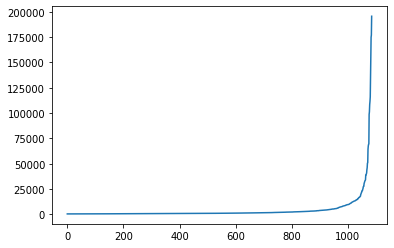

In [50]:
import matplotlib.pyplot as plt

pts = morphemes.values()

plt.plot(pts)
plt.show()